### Computing the rate of spread in the direction normal to the fireline from the fire propagation ellipsoid

Richards (1990) and FARSITE (Finney, 2000) assume that fire spreads to an ellipsoid with axes $a$ and $b$, with the fire starting from a point at distance $c$ on the $b$-axis from the center of the ellipse. The $b$ axis is the direction of the maximal Rate of Spread (ROS), which equals to $b+c$, and is computed from the Rothermel formula. Richards (1990) considers only the wind and zero slope, then the direction of the maximal rate of spread is the wind direction. FARSITE computes a ``resultant'' vector from the slope and wind vectors, which it then substitutes into the Rothermel formula. The computation of the slope and of the resultant vector is not entirely clear; to find out how that is done the heart of the project.

When the fire propagates from a fireline, the ellipsoid method considers it as starting from starting points on the fireline, and the new fireline is then the envelope of the ellipsoid.

WRF-SFIRE works with ROS in the direction of the normal of the fireline, and substitutes in the Rothermel formula the wind speed projected on the normal (i.e., multiplied by the cosine of the wind vector and the normal vector), and the slope (i.e, slope of the gradient of the terrain height) also projected on the normal (i.e., multiplied by the cosine of the slope direction in the horizontal plane and the normal vector).

To compare the fire propagation in WRF-SFIRE and FARSITE, we will find the ROS in the direction normal to the fireline that gives the same fireline movement in the normal direction as what FARSITE does. 

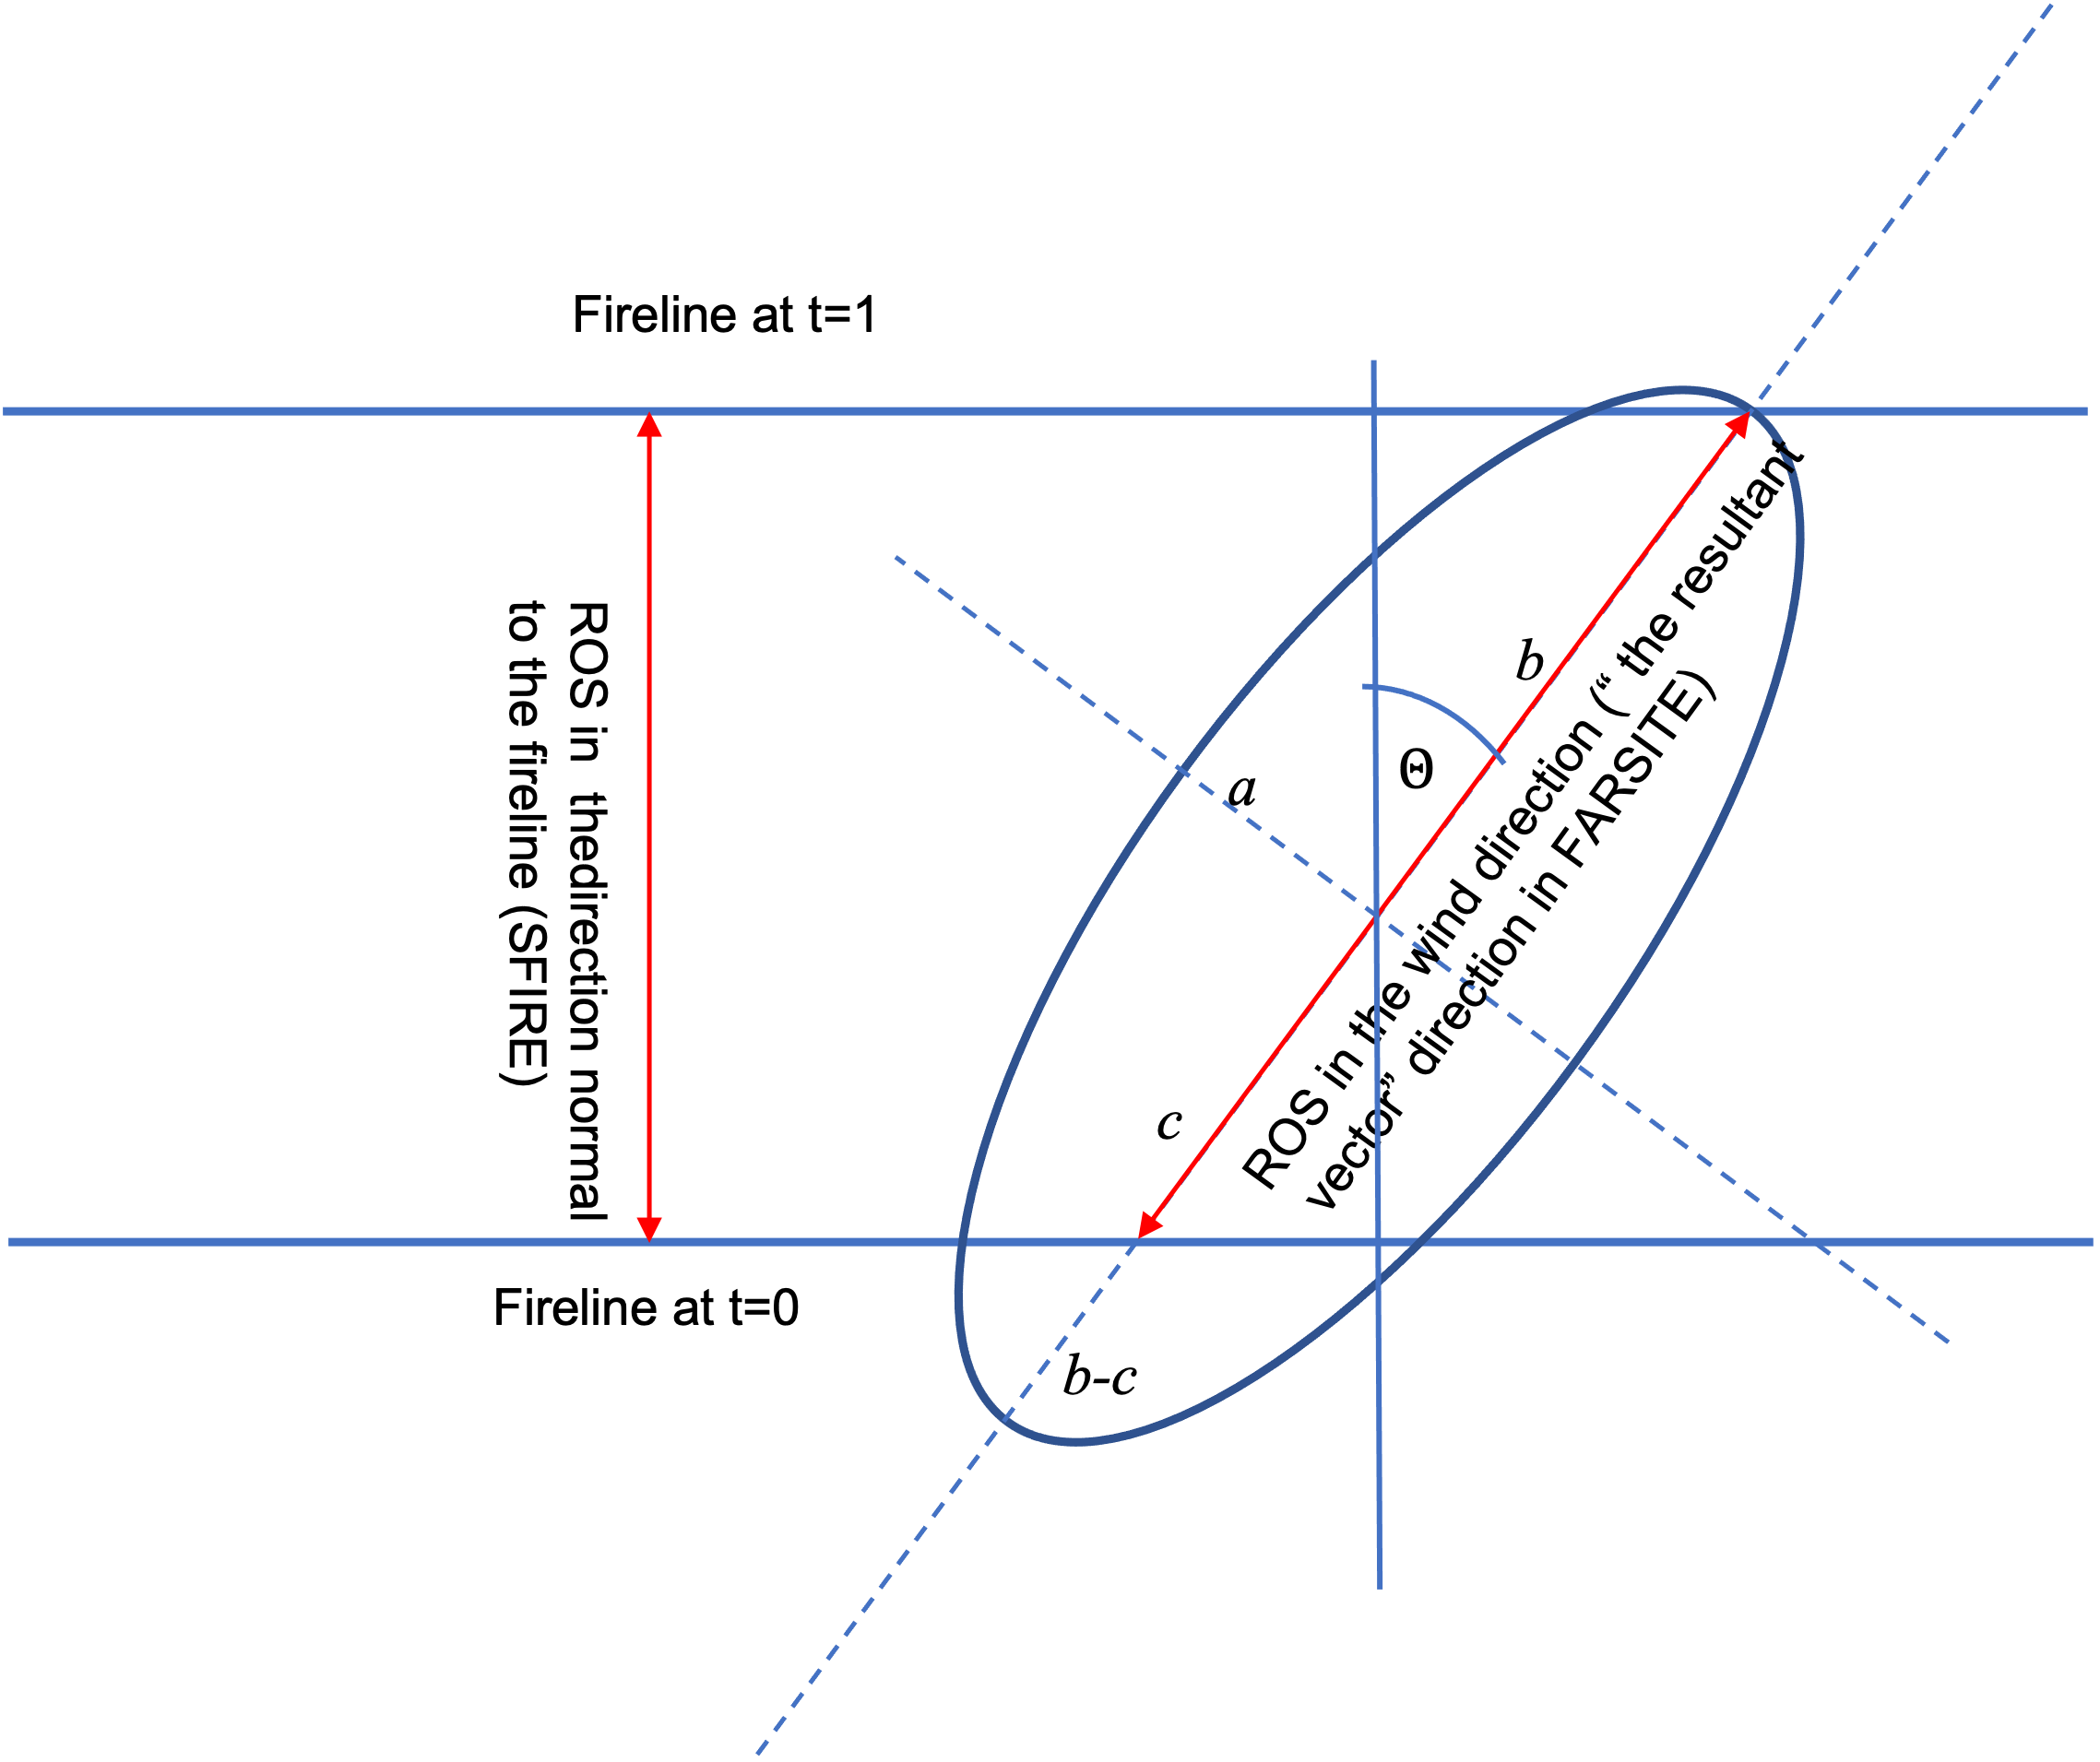

Write the equation of an ellipse with horizontal axis $a$ and vertical axis
$b$ in parametric form
$$
\left[
\begin{array}
[c]{c}
x\\
y
\end{array}
\right]  =\left[
\begin{array}
[c]{c}
a\cos s\\
b\sin s
\end{array}
\right] .
$$
Rotate by an angle $\theta$ clockwise:
$$
\left[
\begin{array}
[c]{c}
x\\
y
\end{array}
\right]  =\left[
\begin{array}
[c]{cc}
\cos\theta & \sin\theta\\
-\sin\theta & \cos\theta
\end{array}
\right]  \left[
\begin{array}
[c]{c}
a\cos s\\
b\sin s
\end{array}
\right]  .
$$
Multiplying out we get
$$
\left[
\begin{array}
[c]{c}
x\\
y
\end{array}
\right]  =\left[
\begin{array}
[c]{c}
a\cos\theta\cos s+b\sin\theta\sin s\\
-a\sin\theta\cos s+b\cos\theta\sin s
\end{array}
\right]  .
$$
Move the center vertically so that the point at distance $c$ from the bottom
vertex on the $b$ axis is at $y=0$,
$$
\left[
\begin{array}
[c]{c}
x\\
y
\end{array}
\right]  =\left[
\begin{array}
[c]{c}
a\cos\theta\cos s+b\sin\theta\sin s\\
-a\sin\theta\cos s+b\cos\theta\sin s+(b-c)\cos\theta
\end{array}
\right]
$$
This is the equation of the ellipse from the figure. The rate of spread in the
direction of the normal equivalent to the ellipse is the distance of the
horizontal lines at $y=0$ and tangent to the top of the rotated shifted
ellipse
$$
R=\max_{s}-a\sin\theta\cos s+b\cos\theta\sin s+(b-c)\cos\theta
$$
The find the highest point, set
$$
y^{\prime}\left(  s\right)  =\frac{\partial}{\partial s}\left(  -a\sin
\theta\cos s+b\cos\theta\sin s+(b-c)\cos\theta\right)  =0
$$
which gives
$$
a\sin\theta\sin s+b\cos\theta\cos s=0
$$
We can either divide by $\sin\theta\neq0$,
$$
\frac{\sin s}{\cos s}+\frac{b}{a}\frac{\cos\theta}{\sin\theta}=0,
$$
and compute $s$ from
$$
s=-\arctan\left(  \frac{b\cos\theta}{a\sin\theta}\right)
$$
Using the arctan2 function in numpy
$$
s=-\text{arctan2}\left(  b\cos\theta,a\sin\theta\right)
$$
gives the correct result even for $\sin\theta=0.$ In any case, we get two solutions, $s$
and $s+\pi$,  substitute in the equation of the ellipse
$$
y=-a\sin\theta\cos s+b\cos\theta\sin s+\left(  b-c\right)  \cos\theta
$$
and take the larger value:
$$
R=\max\left\{  u,-u\right\}  +c\cos\theta,\quad u=-a\sin\theta\cos
s+b\cos\theta\sin s.
$$


The code to compute $R$ from $a,b,c,\theta$ turns out to be just three lines:

In [1]:
import numpy as np
def ros_n(a,b,c,theta):
  # compute fire rate of spread in the direction normal to the fireline for fire
  # propagating according the the ellipsoid method with coefficients a, b, c 
  # and the main axis of the ellipsoid at angle theta from the normal
  
  s = -np.arctan2(b*np.cos(theta),a*np.sin(theta))
  u = -a*np.sin(theta)*np.cos(s) + b*np.cos(theta)*np.sin(s)
  return np.maximum(u,-u) + (b-c)*np.cos(theta)


As always, if we don't verify, it's just a fantasy. Let's draw some pictures.

In [2]:
import matplotlib.pyplot as plt 
def plot_ros(a,b,c,theta):
  r=ros_n(a,b,c,theta)
  def xe(s):   # x coordinate of point on the ellipse
    return a*np.cos(theta)*np.cos(s) + b*np.sin(theta)*np.sin(s)
  def ye(s):   # c coordinate of point on the ellipse
    return -a*np.sin(theta)*np.cos(s) + b*np.cos(theta)*np.sin(s) + (b-c)*np.cos(theta)
  def cline(t,m): # plot line through the center at angle t
    plt.plot([xe(t), xe(t+np.pi)], [ye(t), ye(t+np.pi)],marker='o',linestyle='-.',c=m)
  %matplotlib inline
  plt.figure(figsize=(8,8))
  s=np.linspace(0,2*np.pi,1000)  # parameter
  x = xe(s)
  y = ye(s)
  plt.plot(x,y,      linestyle='--',c='r',label='fire propagation ellipsoid at t=1s')
  cline(0.0,'b')
  cline(np.pi/2,'r')
  
  xx=np.linspace(-b,b,100)
  oo=np.ones(100)
  plt.plot(xx,oo*r,  linestyle='-',c='k',label='fireline at t=1s')
  plt.plot(xx,oo*0.0,linestyle='--',c='k',label='fireline at t=0s')
  plt.ylabel('fire traveled in normal direction (m)')
  plt.title('Normal ROS %s for ellipsoid with a=%s m b=%s m c=%s m at %s rad angle' % (r,a,b,c,theta))
  plt.axis('equal')
  plt.legend()



Now try it on few examples.

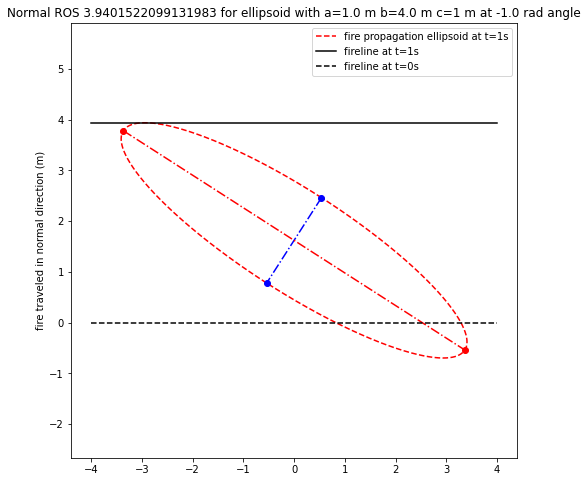

In [3]:
plot_ros(1.0,4.0,1,-1.0)

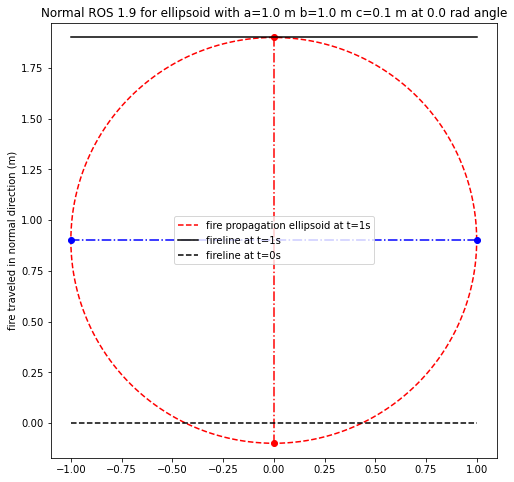

In [4]:
plot_ros(1.0,1.0,0.1,0.0)

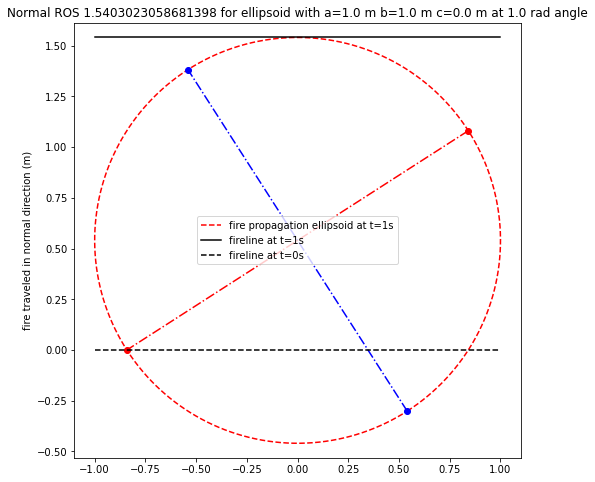

In [5]:
plot_ros(1.0,1.0,0.0,1.0)

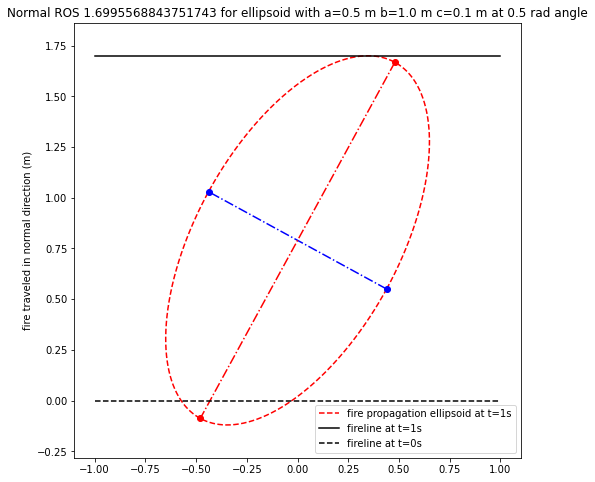

In [6]:
plot_ros(0.5,1.0,0.1,0.5)

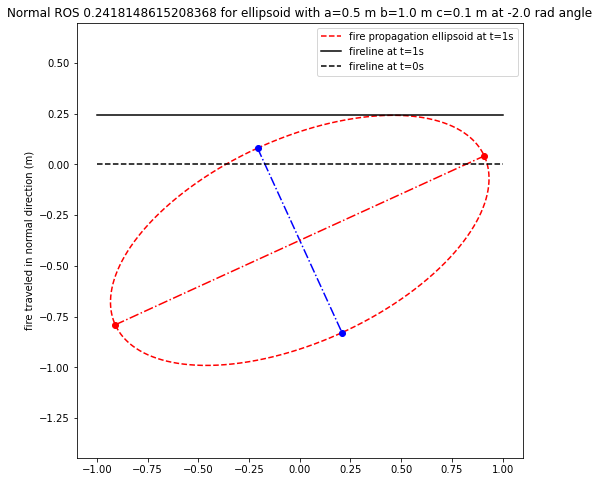

In [7]:
plot_ros(0.5,1.0,0.1,-2.0)

### How FARSITE and WRF-SFIRE compute the ROS